ICN Project - Creating a TensorflowLite Model for Gesture Recognition using CNN 

In [1]:
# Mounting google drive to the kernel
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the required packages
import numpy as np 
import os 
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras import models
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import tensorflow as tf
import pathlib

In [3]:
# Defining the path to access the files
path = '/content/drive/MyDrive/ICN-Dataset'
# Defining all the categorical names
categories = ["C_data", "Down_data", "Fist_data", "Fistm_data", "Index_data", "Lshape_data", "Ok_data", "Palm_m_data", "Palm_data", "Thumb_data"]

In [4]:
# Total no. of categories
total_categories = len(categories)
# The dataset for each categories accessed
x1 = np.load(path+'/'+categories[0]+'.npy')
x2 = np.load(path+'/'+categories[1]+'.npy')
x3 = np.load(path+'/'+categories[2]+'.npy')
x4 = np.load(path+'/'+categories[3]+'.npy')
x5 = np.load(path+'/'+categories[4]+'.npy')
x6 = np.load(path+'/'+categories[5]+'.npy')
x7 = np.load(path+'/'+categories[6]+'.npy')
x8 = np.load(path+'/'+categories[7]+'.npy')
x9 = np.load(path+'/'+categories[8]+'.npy')
x10 = np.load(path+'/'+categories[9]+'.npy')
# Concatenating all the dataset accessed for each category
x_data = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10),axis=0)

In [5]:
# Total no. of images
len(x_data)

2000

In [6]:
# Reshaping the data
x_data = x_data.reshape((len(x_data), 120, 320, 1))

In [7]:
# Total images per category
data_each_type = int(len(x_data)/total_categories)
# Defining or assigning values to the categorical data
y_data = np.zeros((1,data_each_type))
for i in range(0,total_categories-1):
  a = np.ones((1,data_each_type))*(i+1)
  y_data = np.append(y_data,a)
# len(y_data)

In [8]:
# Creating the sequential CNN model
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
# Obtaining the dataset for training and testing using train_test_split function
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.4, random_state = 0)

In [10]:
# Early stopping used in order to find out the best epoch value to obtain the best model
es = EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1)
mc =  ModelCheckpoint('/content/drive/MyDrive/ICN-Dataset/best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)
# Categorical cross entropy used as loss function for the model 
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Fitting the dataset to model with 50 epochs and batch size of 50
model.fit(x_train, y_train, validation_data = (x_test, y_test),
          epochs = 5, batch_size = 50, callbacks = [es, mc])

Epoch 1/5
24/24 [==============================] - 33s 795ms/step - loss: 1.4578 - accuracy: 0.4833 - val_loss: 0.0457 - val_accuracy: 0.9900

Epoch 00001: val_loss improved from inf to 0.04568, saving model to /content/drive/MyDrive/ICN-Dataset/best_model.h5
Epoch 2/5
24/24 [==============================] - 18s 771ms/step - loss: 0.0230 - accuracy: 0.9938 - val_loss: 0.0116 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.04568 to 0.01159, saving model to /content/drive/MyDrive/ICN-Dataset/best_model.h5
Epoch 3/5
24/24 [==============================] - 18s 767ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.0580 - val_accuracy: 0.9775

Epoch 00003: val_loss did not improve from 0.01159
Epoch 4/5
24/24 [==============================] - 18s 763ms/step - loss: 0.0153 - accuracy: 0.9960 - val_loss: 4.9711e-04 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 0.01159 to 0.00050, saving model to /content/drive/MyDrive/ICN-Dataset/best_model.h5
Epoch 5/5
24/2

In [11]:
#model.compile(optimizer='rmsprop',
             # loss='categorical_crossentropy',
              #metrics=['accuracy'])
#model.fit(x_data,y_data, epochs=20)

In [12]:
# We load out the best model that has been stored in our directory
model = tf.keras.models.load_model('/content/drive/MyDrive/ICN-Dataset/best_model.h5')

In [13]:
# Evaluating the accuracy and loss values for the best model
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

25/25 [==============================] - 3s 105ms/step - loss: 2.1284e-04 - accuracy: 1.0000
Accuracy:1.0


In [14]:
# Converted model with no quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpk7uxyo8_/assets


In [15]:
# Convert using dynamic range quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model_quant1 = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpf3i7liok/assets


INFO:tensorflow:Assets written to: /tmp/tmpf3i7liok/assets


In [16]:
# Convert using float fallback quantization
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_data.astype('float32')).batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]

# Converting the model to tensorflowlite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

tflite_model_quant2 = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpb9sg4duj/assets


INFO:tensorflow:Assets written to: /tmp/tmpb9sg4duj/assets


In [18]:
# Printing the parameters of the quantized model
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant2)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


In [19]:
# Convert using integer-only quantization
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_data.astype('float32')).batch(1).take(100):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_quant3 = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpa7140o0r/assets


INFO:tensorflow:Assets written to: /tmp/tmpa7140o0r/assets


In [20]:
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant3)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


In [21]:
tflite_models_dir = pathlib.Path("/content/drive/MyDrive/ICN-Dataset")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

# Save the unquantized/float model:
tflite_model_file = tflite_models_dir/"gesture_model.tflite"
tflite_model_file.write_bytes(tflite_model)
# Save the quantized model:
tflite_model_quant_file1 = tflite_models_dir/"gesture_model_quant_dyn.tflite"
tflite_model_quant_file1.write_bytes(tflite_model_quant1)
tflite_model_quant_file2 = tflite_models_dir/"gesture_model_quant_float.tflite"
tflite_model_quant_file2.write_bytes(tflite_model_quant2)
tflite_model_quant_file3 = tflite_models_dir/"gesture_model_quant_int.tflite"
tflite_model_quant_file3.write_bytes(tflite_model_quant3)

804664

In [22]:
# run the TensorFlow Lite models
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, test_image_indices):
  global x_test

  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = np.zeros((len(test_image_indices),), dtype=int)
  for i, test_image_index in enumerate(test_image_indices):
    test_image = x_test[test_image_index]
    test_label = y_test[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale 
    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions[i] = output.argmax()

  return predictions

In [23]:
# test the models on one image
# Change this to test a different image
test_image_index = 600

## Helper function to test the models on one image
def test_model(tflite_file, test_image_index, model_type):
  global y_test
  predictions = run_tflite_model(tflite_file, [test_image_index])
  plt.plot(x_test[test_image_index].reshape((x_test[test_image_index].shape[0],x_test[test_image_index].shape[1])))
  template = model_type + " Model \n True:{true}, Predicted:{predict}"
  _ = plt.title(template.format(true= str(y_test[test_image_index]), predict=str(predictions[0])))
  plt.grid(False)
  print(predictions)

[8]


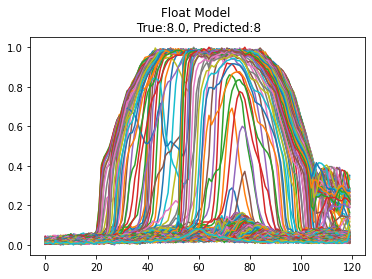

In [24]:
# test the float model
test_model(tflite_model_file, test_image_index, model_type="Float")

[8]


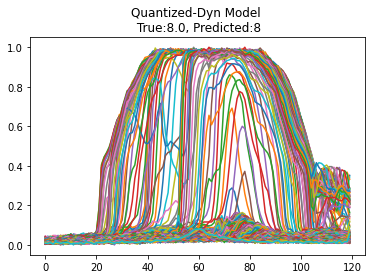

In [25]:
# test the quantized model
test_model(tflite_model_quant_file1, test_image_index, model_type="Quantized-Dyn")

[8]


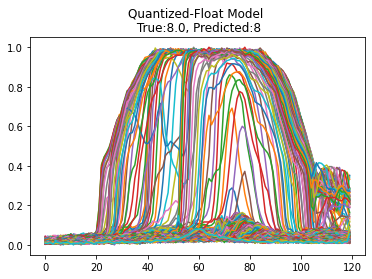

In [26]:
# test the quantized model
test_model(tflite_model_quant_file2, test_image_index, model_type="Quantized-Float")

[8]


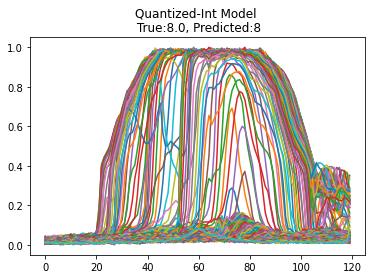

In [27]:
# test the quantized model
test_model(tflite_model_quant_file3, test_image_index, model_type="Quantized-Int")

In [28]:
# evaluate the models on all images
def evaluate_model(tflite_file, model_type):
  global x_test
  global y_test

  test_image_indices = range(x_test.shape[0])
  predictions = run_tflite_model(tflite_file, test_image_indices)

  accuracy = (np.sum(y_test== predictions) * 100) / len(x_test)

  print('%s model accuracy is %.4f%% (Number of test samples=%d)' % (
      model_type, accuracy, len(x_test)))

In [29]:
# evaluate the float model
evaluate_model(tflite_model_file, model_type="Float")

Float model accuracy is 100.0000% (Number of test samples=800)


In [30]:
# evaluate the Dynamic quantized model
evaluate_model(tflite_model_quant_file1, model_type="Quantized-Dyn")

Quantized-Dyn model accuracy is 100.0000% (Number of test samples=800)


In [31]:
# evaluate the Float quantized model
evaluate_model(tflite_model_quant_file2, model_type="Quantized-Float")

Quantized-Float model accuracy is 100.0000% (Number of test samples=800)


In [32]:
# evaluate the Integer quantized model
evaluate_model(tflite_model_quant_file3, model_type="Quantized-Int")

Quantized-Int model accuracy is 100.0000% (Number of test samples=800)
